<a href="https://colab.research.google.com/github/RamilyaKo/-RamilyaKo-s-Repository/blob/main/2_%D0%B4%D0%B5%D0%BD%D1%8C_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_07_12_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 день - Анализ данных

Данные о погоде: https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)
 
 
**Конкурсное ДЗ:**.
 
1) Протестировать качество модели DecisionTreeRegressor + cos(день в году)
 
2) Поиграть с признаками - добавить больше признаков в модель (sin, sin & cos, dayofyear & cos и т.п.)
 
_Сданной считается работа, в которой проделаны эксперименты хотя бы по одному из пунктов, даже если код не удалось заставить работать  :)_

 
**Дедлайн - 20:00 по МСК**
 
ДЗ сдается через Google Form, закрепленную в Телеграм-чате в ввиде ссылки на файл, аналогичный тому, в котором работали сегодня
 
Ссылка на вебинары:
 
1 день:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-znakomimsya-s-python061221/
 
2 день:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-tekhniki-issledovaniya071221/

# Ссылки на ресурсы
[Визуализация работы Дерева Решений (Decision Tree)](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)


[Документация pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

[Документация sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[Документация sklearn DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# Для доп. чтения:
[Wikipedia: Метод наименьших квадратов](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2)

[Что внутри у нейросети: Visualizing Weights - distill.pub](https://distill.pub/2020/circuits/visualizing-weights/)

# Инструкция по отправке ДЗ
Вы выполняете ДЗ в своем файле на Google Диск (можно скопировать этот или создать новый). После чего открываете доступ на чтение по ссылке и отправляете ссылку в Google Форму, которая закреплена в Telegram чате. Файлы без доступа на чтение проверить не получится.

In [ ]:
# Скачивание файла (подставить свою ссылку)
!wget -O "weather.xls.gz" "http://37.9.3.250/download/files.synop/27/27612.01.01.2016.06.12.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2021-12-08 17:58:17--  http://37.9.3.250/download/files.synop/27/27612.01.01.2016.06.12.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.250:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1435630 (1.4M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.37M   908KB/s    in 1.5s    

2021-12-08 17:58:19 (908 KB/s) - ‘weather.xls.gz’ saved [1435630/1435630]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Считываем Excel-таблицу в переменную data
data = pd.read_excel('weather.xls', skiprows=6)
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [ ]:
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
0,06.12.2021 21:00,-3.2,752.0,766.4,-0.5,88.0,"Ветер, дующий с юго-востока",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,-3.2,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,7,-4.9,0.3,12.0,NaN,NaN,NaN,NaN,2021-12-06 21:00:00
1,06.12.2021 18:00,-3.6,752.5,766.9,0.0,89.0,"Ветер, дующий с юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,200-300,NaN,NaN,7,-5.1,0.3,12.0,NaN,NaN,NaN,NaN,2021-12-06 18:00:00
2,06.12.2021 15:00,-4.2,752.5,766.9,0.5,89.0,"Ветер, дующий с юго-востока",2,NaN,NaN,100%.,Дымка.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,200-300,NaN,NaN,NaN,-5.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-06 15:00:00
3,06.12.2021 12:00,-5.7,752.0,766.5,0.6,90.0,"Ветер, дующий с востока",1,NaN,NaN,100%.,Снежные зерна (с туманом или без него).,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,200-300,NaN,NaN,3.2,-7.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-06 12:00:00
4,06.12.2021 09:00,-6.5,751.4,766.0,0.8,89.0,"Ветер, дующий с северо-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,-6.6,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,300-600,NaN,NaN,7,-8.1,0.2,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,10,2021-12-06 09:00:00
5,06.12.2021 06:00,-5.7,750.6,765.1,0.5,94.0,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,-5.8,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,4.3,-6.5,0.2,12.0,NaN,NaN,NaN,NaN,2021-12-06 06:00:00
6,06.12.2021 03:00,-5.2,750.1,764.5,0.9,92.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,100%.,Дымка.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,6,-6.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-06 03:00:00
7,06.12.2021 00:00,-4.4,749.2,763.5,1.0,92.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,100%.,Дымка.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,100-200,NaN,NaN,7,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-06 00:00:00
8,05.12.2021 21:00,-3.0,748.2,762.4,1.1,92.0,"Штиль, безветрие",0,NaN,NaN,100%.,Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,-1.0,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,4.8,-4.1,1,12.0,NaN,NaN,NaN,NaN,2021-12-05 21:00:00
9,05.12.2021 18:00,-1.8,747.1,761.4,0.8,92.0,"Штиль, безветрие",0,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,9,-3.0,2,12.0,NaN,NaN,NaN,NaN,2021-12-05 18:00:00


In [ ]:
data.columns  # Атрибут объекта - список колонок

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'date'],
      dtype='object')

In [ ]:
# Pandas DataFrame (наша data) - это таблицы, которые хранятся по столбцам, т.е. если мы хотим получить данные о температуре 
# в строке 15, мы в квадратных скобках пишем сначала название колонки, потом номер строки
print('Температура в строке 15 =', data['T'][15])
data['T']

Температура в строке 15 = -5.3


0        -3.2
1        -3.6
2        -4.2
3        -5.7
4        -6.5
         ... 
17326   -15.0
17327   -14.8
17328   -14.6
17329   -14.0
17330   -12.9
Name: T, Length: 17330, dtype: float64

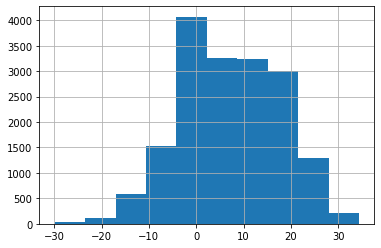

In [ ]:
# Гистограмма - график, который показывает, сколько раз встречалось то или иное значние
data['T'].hist()

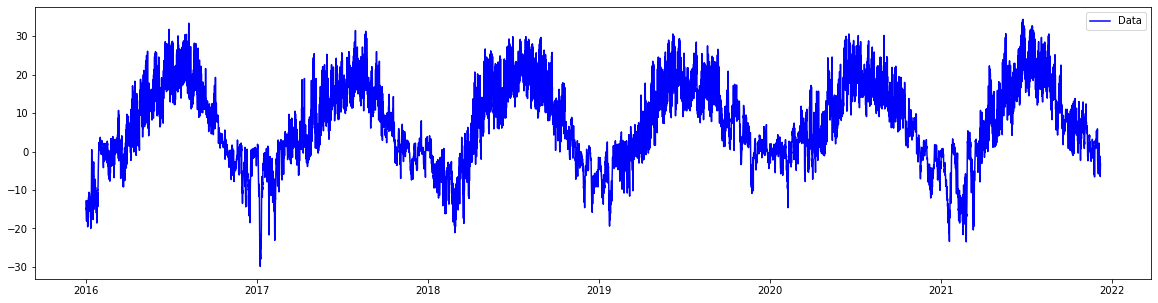

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['T'], color='blue', label='Data')
plt.legend()

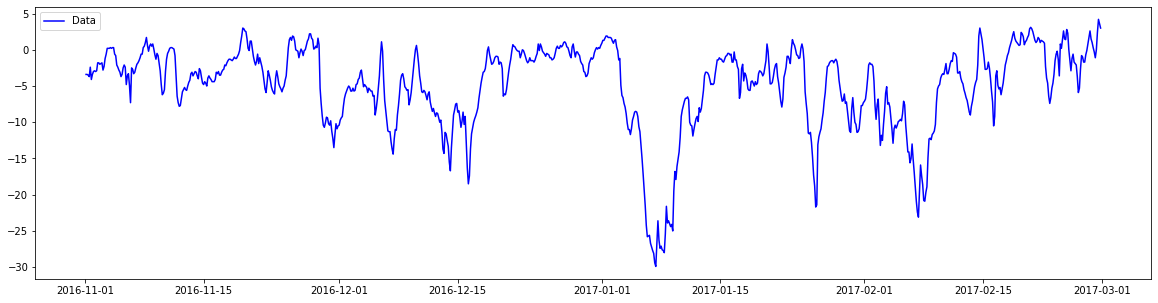

In [ ]:
# 1) вариант как можно было делать упражнение 1-го дня:
# data['date'] > '2016-11-01'
# data['date'] < '2017-03-01'

condition1 = data['date'] > '2016-11-01'
data1 = data[condition1]

condition2 = data1['date'] < '2017-03-01'
data2 = data1[condition2]

plt.figure(figsize=(20, 5))
plt.plot(data2['date'], data2['T'], color='blue', label='Data')
plt.legend()

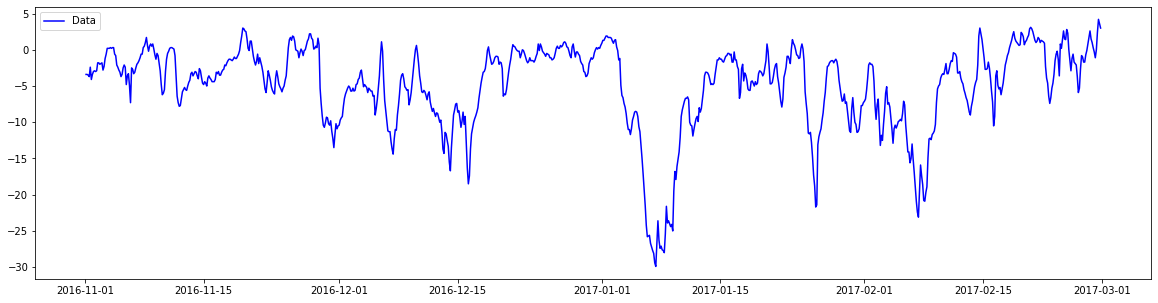

In [ ]:
# 2) вариант в одну строку
condition = (data['date'] > '2016-11-01') & (data['date'] < '2017-03-01')
data2 = data[condition]

plt.figure(figsize=(20, 5))
plt.plot(data2['date'], data2['T'], color='blue', label='Data')
plt.legend()

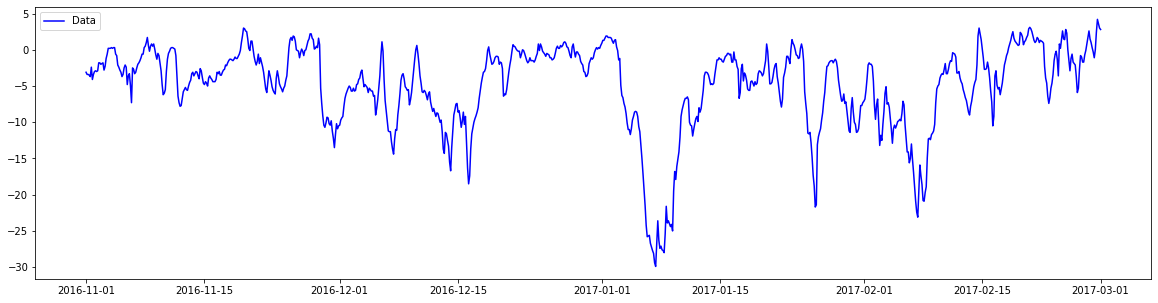

In [ ]:
# 3) вариант в одну строку с помощью функции between
data2 = data[data['date'].between('2016-11-01', '2017-03-01')]

plt.figure(figsize=(20, 5))
plt.plot(data2['date'], data2['T'], color='blue', label='Data')
plt.legend()

Сегодня мы будем строить прогнозные модели и проверять гиспотезы

# 1 шаг - Разделение данных на train-test

Вначале нужно разбить данные на 2 выборки: на тренировочную (обучающую, train) и тестовую (валидационную, test, val)

На обучающей выборке модель подгоняет свои внутренние параметры с помощью статистики ("обучение", fit)

На тестовой выборке мы тестируем качество модели, на ней она как студент проходит экзамен

Если студент вызубрил ответы, но ничего не понял - точность ответов на тренировочной выборке будет высокой, а на тестовой - очень низкой

In [ ]:
# data_train - тренировочная выборка
# data_test - тестовая выборка

In [ ]:
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

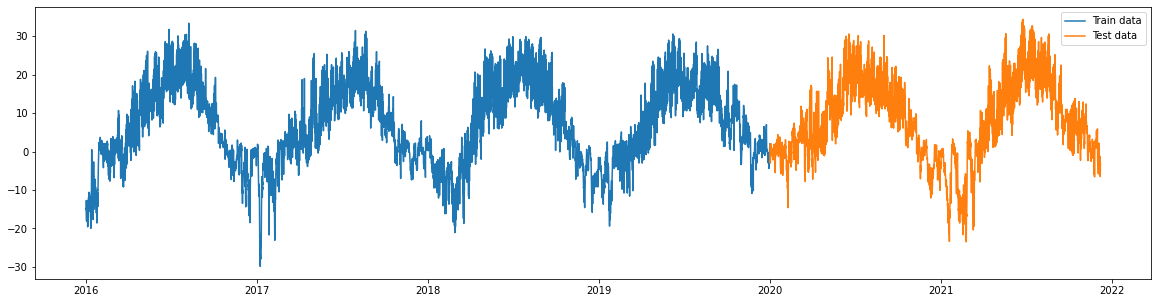

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], data_train['T'], label = 'Train data')
plt.plot(data_test['date'], data_test['T'], label = 'Test data')
plt.legend()

Хотим прогнозировать температуру в зависимости от дня в году

# 2 шаг - Feature engineering - работа с признаками

Генерируем новые **признаки** (features, "фичи", факторы) и/или преобразуем имеющиеся для прогноза величины

In [ ]:
# Создаем новый признак - день в году
data['dayofyear'] = data['date'].dt.dayofyear
# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

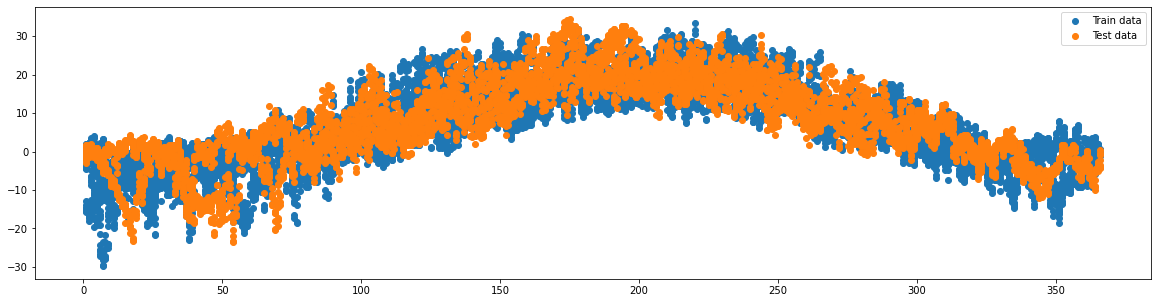

In [ ]:
plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], data_train['T'], label = 'Train data')
plt.scatter(data_test['dayofyear'], data_test['T'], label = 'Test data')
plt.legend()

# Линейная регрессия (самая простая модель)

$z = ax+b$

$\sum(y_n - z_n)^2 \rightarrow min$ варьируя a и b


* a и b - **параметры** модели

* y  -  **target** (таргет, целевая переменная) - величина, которую хотим прогнозировать. Ее значения совершенно не обязаны лежать на одной прямой, могут быть случайные отклонения

* X -  **features** (признаки) -  факторы, по которым хотим прогнозировать что-то ($x_1$ - температура,  $x_2$ - давление, и т.п.) Сколько колонок в данных, на основе которых мы хотим делать прогноз - столько иксов и будет в уравнении

Если признаков (иксов) много, линейная модель будет выглядеть так:

$z = a_1 x_1 + a_2 x_2 + ... + b$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Для того, чтобы обучить модель, нужно разделить выборку 
# на фичи (признаки, features, X) и таргет (целевую переменную, которую прогнозируем, target, y)
# 2 датасета train-test х 2 features-target - создаем 4 переменных: 
# X_train, y_train, X_test, y_test

# Вначале для простототы мы будем делать прогноз только на одном факторе - номере дня в году data['dayofyear']
# Но модель ожидает, что ей на вход придет двумерная таблица - 
# поэтому создаем из колонки date['T'] полноценную таблицу pandas DataFrame

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']


# "y" оставляем столбцом, как есть
y_train = data_train['T']
y_test = data_test['T']

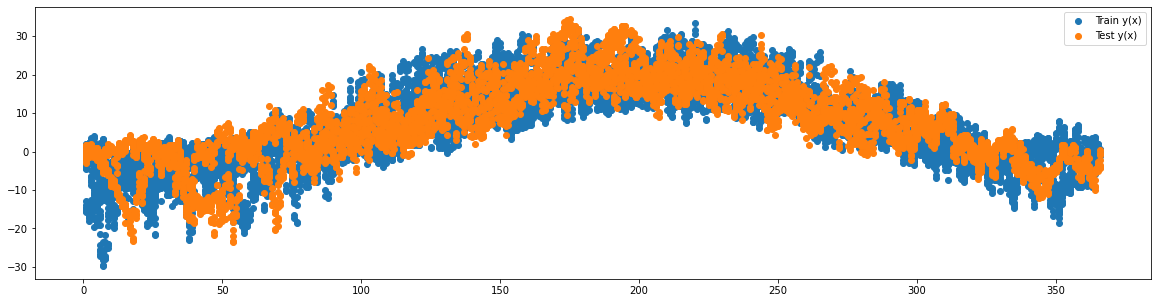

In [ ]:
# Scatter - график из точек, а не из линий
plt.figure(figsize=(20, 5))
plt.scatter(X_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(X_test['dayofyear'], y_test, label='Test y(x)')
plt.legend()

# График тот же самый, но с помощью новых переменных

# 1 модель: LinearRegression + dayofyear

In [ ]:
# 1 модель: LinearRegression + dayofyear

In [ ]:
# Создаем пустой объект со случайными a и b, которые пока не описывают наши данные

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

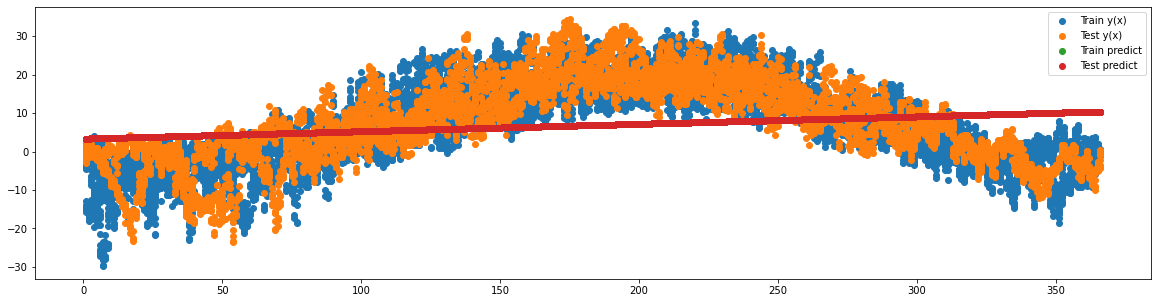

In [ ]:
# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(X_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(X_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(X_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(X_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

In [ ]:
# Проверяем качество численно

# mean_squared_error - средняя сумма квадратов отклонений (меньше -> лучше)

from sklearn.metrics import mean_squared_error

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

Сумма ошибок на тренировочных данных = 105.66810600668143
Сумма ошибок на тестовых данных = 99.28922767683305


Сумма ошибок на тренировочных данных = 105.66810600668143
Сумма ошибок на тестовых данных = 99.28922767683305


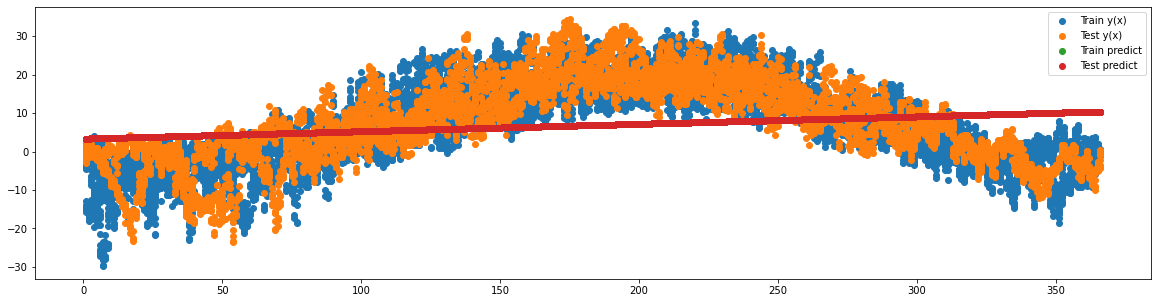

In [ ]:
# Собираем все воедино
# 1) LinearRegression + dayofyear


# Заново переразбиваем датасет на train-test, чтобы изменения применились
data['dayofyear'] = data['date'].dt.dayofyear
# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression()
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(X_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(X_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(X_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(X_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Что хочется изменить?
Данные у нас сезонные и плавные, т.е. 1 января почти не отличается от 31 декабря

Линейная регрессия построила прямую линию от 1 до 365 дня в году, которая в среднем получилась возрастающая, из-за этого мы видим некорректное поведение на границах года

# Есть 2 опции: 
1) придумать как изменить признаки для того, чтобы модель стала лучше 

2) использовать другую модель

Начинаем проверять гипотезы

#  *Гипотеза 1: хорошо сработает тригонометрическое преобразование признаков*

In [ ]:
# Подключаем пакет numpy для математических функций

import numpy as np

In [ ]:
# Посмотрим, в каком диапазоне находятся данные признака dayofyear
data['dayofyear'].min(), data['dayofyear'].max()

(1, 366)

In [ ]:
# Вернемся на шаг 1 feature generation - создаем новые признаки:
# scaled_dayofyear - сжимает диапазон [1, 366] -> [0, 2pi] - переходим в радианы
scaled_dayofyear = (data['dayofyear'] - 1) / 366 * 2 * np.pi

# cos_dayofyear - косинус дня в году (= длина проекции номера дня в году на горизонтальную ось, если представить номера циферблатом)

data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

In [ ]:
data['cos_dayofyear'].min(), data['cos_dayofyear'].max()

(-1.0, 1.0)

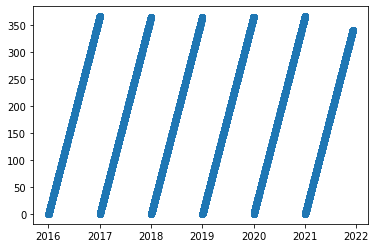

In [ ]:
# График исходного признака

plt.scatter(data['date'], data['dayofyear'])

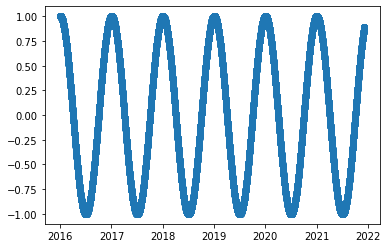

In [ ]:
# График, сглаженный тригонометрической функцией

plt.scatter(data['date'], data['cos_dayofyear'])

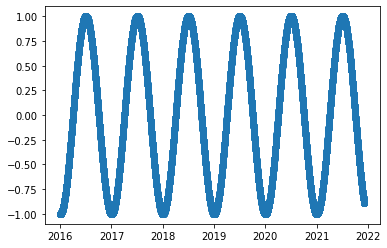

In [ ]:
plt.scatter(data['date'], -data['cos_dayofyear'])

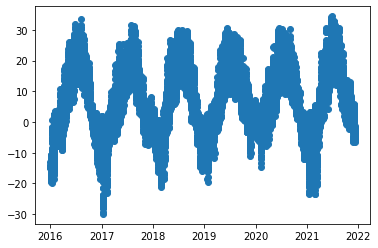

In [ ]:
plt.scatter(data['date'], data['T'])

# 2) LinearRegression + cos dayofyear

Linear Regression на тригонометрических параметрах

$z = a \cos ((x-1) / 366 * 2 \pi) + b$

Сумма ошибок на тренировочных данных = 29.40398343167642
Сумма ошибок на тестовых данных = 32.01336163911195


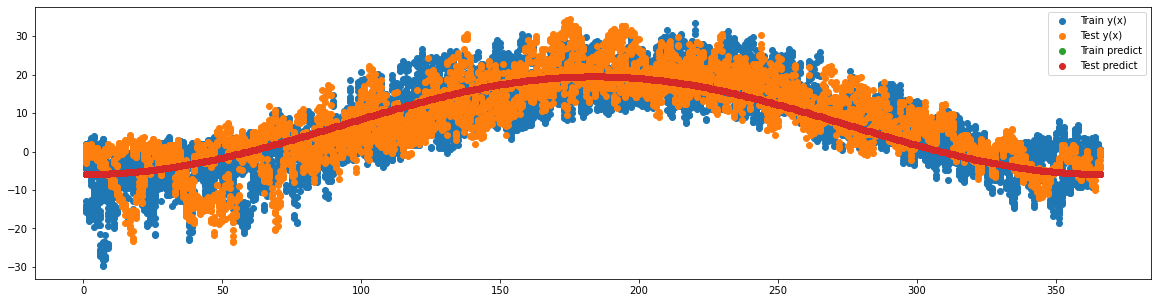

In [ ]:
# 2) LinearRegression + cos dayofyear

# Переходим в радианы, создаем новую переменную с cos
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# Повторяем все то же самое
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_train = data_train['T']
y_test = data_test['T']


model = LinearRegression()
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Для 1 модели LinearRegression + dayofyear
# Сумма ошибок на тренировочных данных = 105.66810600668143
# Сумма ошибок на тестовых данных = 99.28922767683305

# Для 1 модели LinearRegression + cos_dayofyear
# Сумма ошибок на тренировочных данных = 29.40398343167642
# Сумма ошибок на тестовых данных = 32.01336163911195

Гипотеза 2: другая модель сработает лучше

# 3) Decision Tree + dayofyear
http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Сумма ошибок на тренировочных данных = 21.154194319706576
Сумма ошибок на тестовых данных = 32.46667849748203


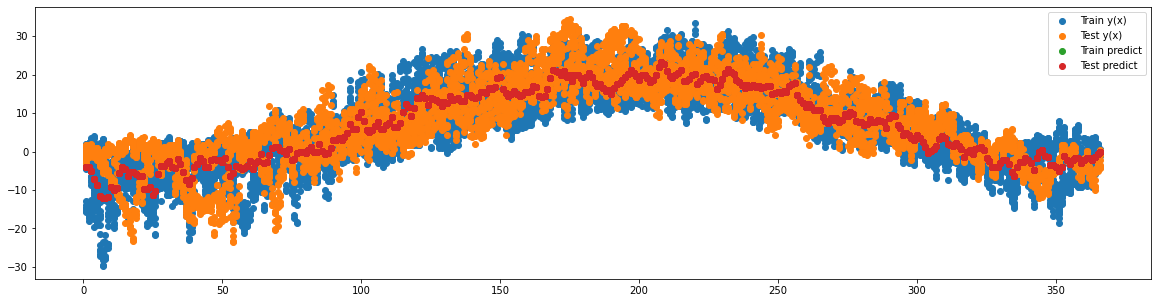

In [ ]:
# 3) Decision Tree + dayofyear


# Повторяем все то же самое
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_train = data_train['T']
y_test = data_test['T']


model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Для 1 модели LinearRegression + dayofyear
# Сумма ошибок на тренировочных данных = 105.66810600668143
# Сумма ошибок на тестовых данных = 99.28922767683305

# Для 1 модели LinearRegression + cos_dayofyear
# Сумма ошибок на тренировочных данных = 29.40398343167642
# Сумма ошибок на тестовых данных = 32.01336163911195

# Для 3 модели DecisionTreeRegressor + dayofyear
# Сумма ошибок на тренировочных данных = 21.154194319706576
# Сумма ошибок на тестовых данных = 32.46667849748203

Сумма ошибок на тренировочных данных = 23.238699638200927
Сумма ошибок на тестовых данных = 31.662275174687192


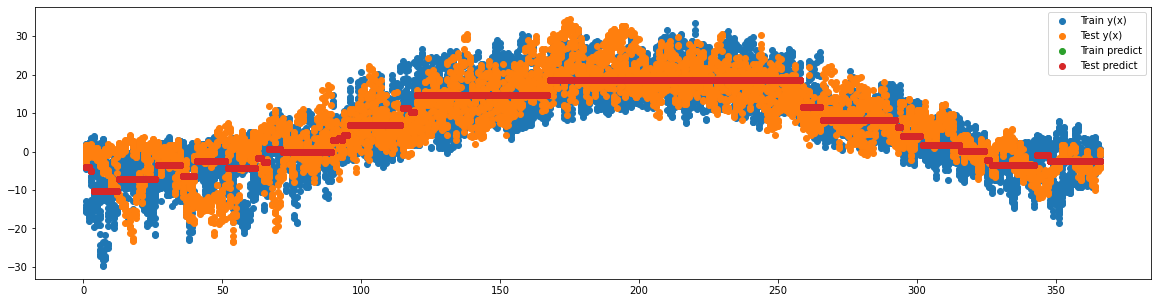

In [ ]:
# 4) Decision Tree + dayofyear + подкрутим гиперпараметр


# Повторяем все то же самое
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_train = data_train['T']
y_test = data_test['T']


model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Для 1 модели LinearRegression + dayofyear
# Сумма ошибок на тренировочных данных = 105.66810600668143
# Сумма ошибок на тестовых данных = 99.28922767683305

# Для 1 модели LinearRegression + cos_dayofyear
# Сумма ошибок на тренировочных данных = 29.40398343167642
# Сумма ошибок на тестовых данных = 32.01336163911195

# Для 3 модели DecisionTreeRegressor + dayofyear
# Сумма ошибок на тренировочных данных = 21.154194319706576
# Сумма ошибок на тестовых данных = 32.46667849748203

# Разбор ДЗ

DecisionTreeRegressor + cos_dayofyear

Сумма ошибок на тренировочных данных = 28.37804968032398
Сумма ошибок на тестовых данных = 33.567686179543934


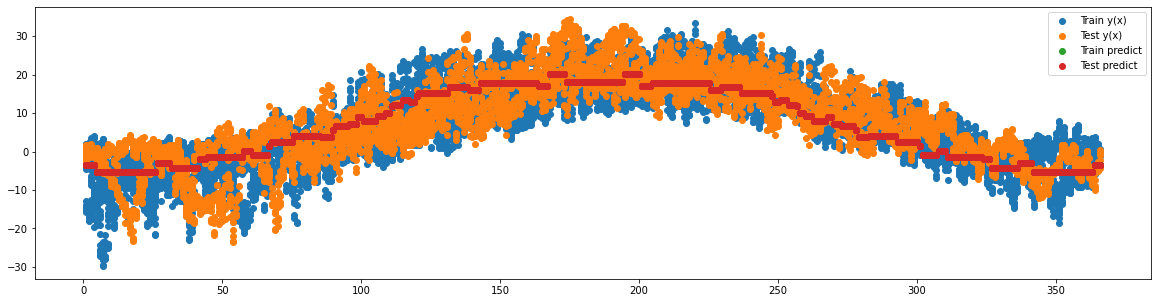

In [ ]:
# 4) Decision Tree + cos_dayofyear + подкрутим гиперпараметр


# Повторяем все то же самое
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_train = data_train['T']
y_test = data_test['T']


model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Для 1 модели LinearRegression + dayofyear
# Сумма ошибок на тренировочных данных = 105.66810600668143
# Сумма ошибок на тестовых данных = 99.28922767683305

# Для 1 модели LinearRegression + cos_dayofyear
# Сумма ошибок на тренировочных данных = 29.40398343167642
# Сумма ошибок на тестовых данных = 32.01336163911195

# Для 3 модели DecisionTreeRegressor + dayofyear
# Сумма ошибок на тренировочных данных = 21.154194319706576
# Сумма ошибок на тестовых данных = 32.46667849748203

# Для 3 модели DecisionTreeRegressor + cos_dayofyear
# Сумма ошибок на тренировочных данных = 28.37804968032398
# Сумма ошибок на тестовых данных = 33.567686179543934

In [ ]:
# Ошибка увеличилась. Вывод: не всегда изменение, которое нам кажется хорошим, приводит к реальному улучшению результата

LinearRegressor + cos + sin

Сумма ошибок на тренировочных данных = 25.293104204282933
Сумма ошибок на тестовых данных = 26.87856651716397


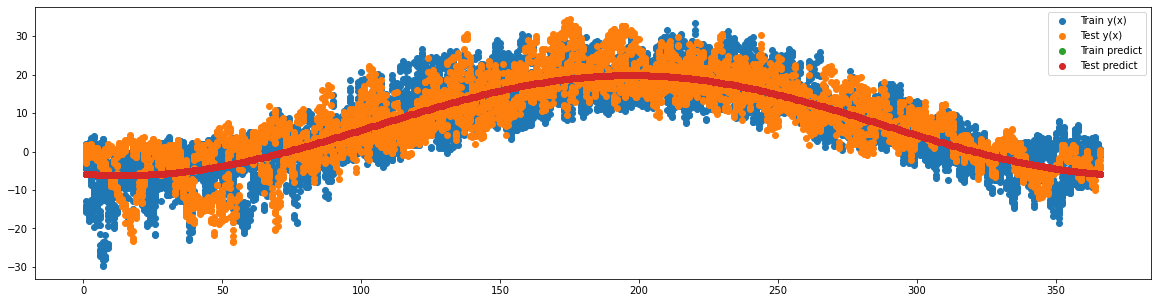

In [ ]:
# LinReg + cos_dayofyear + sin_dayofyear
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# Повторяем все то же самое
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_train['sin_dayofyear'] = data_train['sin_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
X_test['sin_dayofyear'] = data_test['sin_dayofyear']
y_train = data_train['T']
y_test = data_test['T']


model = LinearRegression()
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Для 1 модели LinearRegression + dayofyear
# Сумма ошибок на тренировочных данных = 105.66810600668143
# Сумма ошибок на тестовых данных = 99.28922767683305

# Для 1 модели LinearRegression + cos_dayofyear
# Сумма ошибок на тренировочных данных = 29.40398343167642
# Сумма ошибок на тестовых данных = 32.01336163911195

# Для 3 модели DecisionTreeRegressor + dayofyear
# Сумма ошибок на тренировочных данных = 21.154194319706576
# Сумма ошибок на тестовых данных = 32.46667849748203

# Для модели DecisionTreeRegressor + cos_dayofyear
# Сумма ошибок на тренировочных данных = 28.37804968032398
# Сумма ошибок на тестовых данных = 33.567686179543934

# Для модели DecisionTreeRegressor + cos_dayofyear
# Сумма ошибок на тренировочных данных = 25.293104204282933
# Сумма ошибок на тестовых данных = 26.87856651716397

In [ ]:
np.random.randint(2, 28)

5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1 366
-1.0 1.0


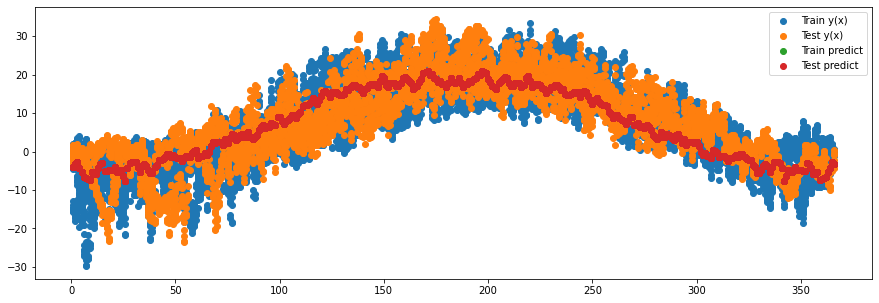

Сумма ошибок на тренировочных данных = 27.902677874377456
Сумма ошибок на тестовых данных = 34.00362865861788


In [ ]:
# ДЗ номер 1

#!/usr/bin/python3
# -*- coding: utf-8 -*

# Skillbox: Интенсив «Профессия Data Scientist: учимся обработке и анализу данных за 3 дня»
# Autor: Artem Andreev, 2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Считываем Excel-таблицу в переменную data
data = pd.read_excel('weather.xls')

# Удаляем лишние комментарии (первые 6 строк)
data = pd.read_excel('weather.xls', skiprows=6)

# Создали новую колонку в правильном формате:
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

good_condition = data['T'].notna()
data = data[good_condition]


# 1 шаг - Разделение данных на train-test
# data_train - тренировочная выборка
# data_test - тестовая выборка

#data_train = data[data['date'] < '2020-01-01']
#data_test = data[data['date'] >= '2020-01-01']


# 2 шаг - Feature engineering - работа с признаками
# Генерируем новые признаки (features, "фичи", факторы) и/или преобразуем имеющиеся для прогноза величины

# Создаем новый признак - день в году
data['dayofyear'] = data['date'].dt.dayofyear


# Посмотрим, в каком диапазоне находятся данные признака dayofyear
print(data['dayofyear'].min(), data['dayofyear'].max())

# Вернемся на шаг 1 feature generation - создаем новые признаки:
# scaled_dayofyear - сжимает диапазон [1, 366] -> [0, 2pi] - переходим в радианы
scaled_dayofyear = (data['dayofyear'] - 1) / 366 * 2 * np.pi

# cos_dayofyear - косинус дня в году (= длина проекции номера дня в году на горизонтальную ось, если представить номера циферблатом)
# Переходим в радианы, создаем новую переменную с cos
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)
print(data['cos_dayofyear'].min(), data['cos_dayofyear'].max())
#data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 * np.pi)
#print(data['sin_dayofyear'].min(), data['sin_dayofyear'].max())

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
#X_train['sin_dayofyear'] = data_train['sin_dayofyear']


X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
#X_test['sin_dayofyear'] = data_test['sin_dayofyear']


# "y" оставляем столбцом, как есть
y_train = data_train['T']
y_test = data_test['T']


#model = LinearRegression()
model = DecisionTreeRegressor()
#model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем прогноз для тренировочных данных
pred_train = model.predict(X_train)
# Прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(15, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

plt.show()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
#print('Средняя абсолютная ошибка на тренировочных данных =', mean_absolute_error(y_train, pred_train))
#print('Среднеквадратичная ошибка на тренировочных данных =', np.sqrt(mean_squared_error(y_train, pred_train)))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))
#print('Средняя абсолютная ошибка на тестовых данных =', mean_absolute_error(y_test, pred_test))
#print('Среднеквадратичная ошибка на тестовых данных =', np.sqrt(mean_squared_error(y_test, pred_test)))

# Результаты:
# cos:
# model = LinearRegression()
#Сумма ошибок на тренировочных данных = 29.40398343167642
#Сумма ошибок на тестовых данных = 32.54436293526911
#
# model = DecisionTreeRegressor()
#Сумма ошибок на тренировочных данных = 27.902677874377456
#Средняя абсолютная ошибка на тренировочных данных = 4.158692656624444
#Среднеквадратичная ошибка на тренировочных данных = 5.282298540822684
#Сумма ошибок на тестовых данных = 34.38673098033278
#Средняя абсолютная ошибка на тестовых данных = 4.679613780787396
#Среднеквадратичная ошибка на тестовых данных = 5.864020035805878
#
# model = DecisionTreeRegressor(max_depth=3)
#Сумма ошибок на тренировочных данных = 28.970997480355905
#Сумма ошибок на тестовых данных = 34.93729003687786
#
#sin
#model = DecisionTreeRegressor()
#Сумма ошибок на тренировочных данных = 103.89141004860807
#Сумма ошибок на тестовых данных = 105.02169641417427

In [ ]:
np.random.randint(2, 28)

2

In [ ]:
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 * np.pi)

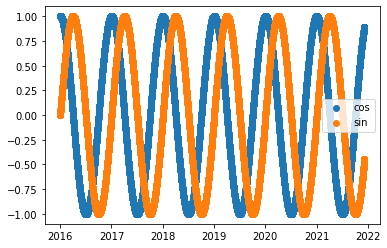

In [ ]:
plt.scatter(data['date'], data['cos_dayofyear'], label='cos')
plt.scatter(data['date'], data['sin_dayofyear'], label='sin')
plt.legend()

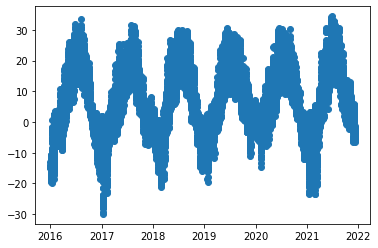

In [ ]:
plt.scatter(data['date'], data['T'])

In [ ]:
# ДЗ номер 2

Сумма ошибок на тренировочных данных = 105.70138724524625
Сумма ошибок на тестовых данных = 99.30578060250927


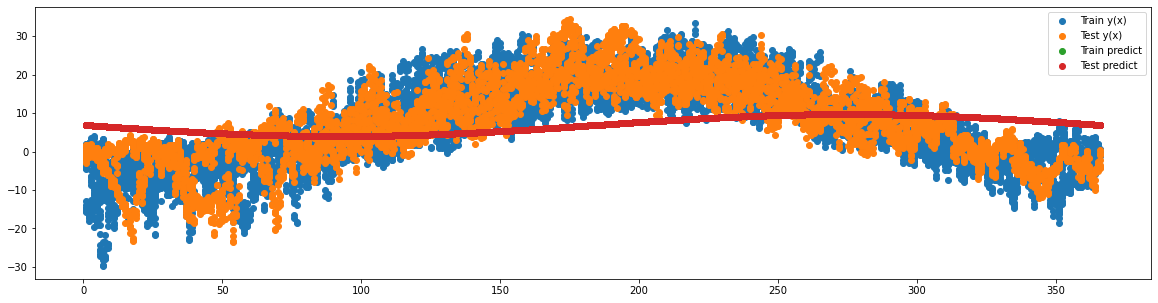

In [ ]:
# 5) LinearRegression + sin dayofyear

data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 366 * 2 *  np.pi)

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['sin_dayofyear'] = data_train['sin_dayofyear']
X_test = pd.DataFrame()
X_test['sin_dayofyear'] = data_test['sin_dayofyear']
y_train = data_train['T']
y_test = data_test['T']


model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test['dayofyear'], pred_test, label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Для 1 модели LinearRegression + dayofyear
# Сумма ошибок на тренировочных данных = 105.66810600668143
# Сумма ошибок на тестовых данных = 99.28922767683305

# Для 2 модели LinearRegression + cos_dayofyear
# Сумма ошибок на тренировочных данных = 29.40398343167642
# Сумма ошибок на тестовых данных = 32.01336163911195

# Для 3 модели DecisionTreeRegressor + dayofyear
# Сумма ошибок на тренировочных данных = 21.154194319706576
# Сумма ошибок на тестовых данных = 32.46667849748203

# Для 4 модели DecisionTreeRegressor + cos_dayofyear
# Сумма ошибок на тренировочных данных = 27.902677874377456
# Сумма ошибок на тестовых данных = 34.00362865861788
# Вывод: модель DecisionTreeRegressor + dayofyear лучше

# Для 5 модели LinearRegression + sin_dayofyear
# Сумма ошибок на тренировочных данных = 105.70138724524625
# Сумма ошибок на тестовых данных = 99.30578060250927
# Вывод: что-то пошло не так...

$z = ax + b$ - простая линейная регрессия

$z = a \cos(x) + b$ - линейная регрессия на признаке с косинусом - улучшает модель

$z = a \sin(x) + b$ - линейная регрессия на признаке с синусом - ухудшает модель

$z = a_1 \sin(x) + a_2 \cos(x) + b$ - линейная регрессия на 2 признаках - улучшает модель

In [ ]:
np.random.randint(2, 28)

15